# Preprocessing
1. Data Cleaning
2. Data Transformation

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay, auc
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('heart_2022_with_nans.csv', sep=',')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [5]:
data.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [6]:
data_no = data.dropna(how='any', inplace=True)
print("Jumlah Mising Value = ", data_no)
data.isnull().sum()

Jumlah Mising Value =  None


State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

In [8]:
data.duplicated().sum()

9

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.WeightInKilograms.head()

342     71.67
343     95.25
345    108.86
346     90.72
347     79.38
Name: WeightInKilograms, dtype: float64

In [11]:
data.drop("WeightInKilograms", axis=1, inplace=True)
data.drop("HeightInMeters", axis=1, inplace=True)
data.drop("HadAngina", axis=1, inplace=True)
data.drop("HadStroke", axis=1, inplace=True)
data.drop("HadAsthma", axis=1, inplace=True)
data.drop("HadSkinCancer", axis=1, inplace=True)
data.drop("HadCOPD", axis=1, inplace=True)
data.drop("HadDepressiveDisorder", axis=1, inplace=True)
data.drop("HadKidneyDisease", axis=1, inplace=True)
data.drop("HadArthritis", axis=1, inplace=True)
data.drop("HadDiabetes", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

In [12]:
data.AgeCategory.value_counts()

AgeCategory
Age 65 to 69       28555
Age 60 to 64       26719
Age 70 to 74       25737
Age 55 to 59       22224
Age 50 to 54       19912
Age 75 to 79       18133
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

In [13]:
le = LabelEncoder()

In [14]:
data['AgeCategory'] = le.fit_transform(data['AgeCategory'])
data.AgeCategory.value_counts()

AgeCategory
9     28555
8     26719
10    25737
7     22224
6     19912
11    18133
12    17816
4     16973
5     16753
3     15614
2     13346
0     13122
1     11109
Name: count, dtype: int64

In [15]:
data['AgeCategoryCat'] = data['AgeCategory']
data.loc[data['AgeCategory'] <= 3, 'AgeCategoryCat'] = 'Adults'
data.loc[data['AgeCategory'] > 3, 'AgeCategoryCat'] = 'Middle-Aged-Adult'
data.loc[data['AgeCategory'] >7, 'AgeCategoryCat'] = 'Other-Adults'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5916\17247790.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Adults' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[data['AgeCategory'] <= 3, 'AgeCategoryCat'] = 'Adults'


In [16]:
data['AgeCategoryCat'].value_counts()

AgeCategoryCat
Other-Adults         116960
Middle-Aged-Adult     75862
Adults                53191
Name: count, dtype: int64

In [17]:
data.drop('AgeCategory', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

In [18]:
data['BMICat'] = data['BMI']
data.loc[data['BMI'] < 18.50, 'BMICat'] = 'Underweight'
data.loc[data['BMI'] >= 18.50, 'BMICat']= 'Healthy Weight'
data.loc[data['BMI'] >= 25.00, 'BMICat']= 'Overweight'
data.loc[data['BMI'] >=30.00, 'BMICat']='Obese'
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5916\4042854362.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Underweight' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['BMI'] < 18.50, 'BMICat'] = 'Underweight'


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,Other-Adults,Overweight
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Other-Adults,Obese
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Obese


In [19]:
data[data['BMI'] ==30.00]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat
2814,Alabama,Male,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,30.0,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Obese
6231,Alaska,Male,Good,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,30.0,No,Yes,Yes,No,"Yes, received Tdap",No,Yes,Adults,Obese
6496,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,30.0,No,Yes,No,No,"Yes, received Tdap",No,No,Middle-Aged-Adult,Obese
7961,Alaska,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,"6 or more, but not all",Yes,...,30.0,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No,Other-Adults,Obese
13232,Arizona,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,30.0,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432397,Wyoming,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,30.0,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Obese
440876,Puerto Rico,Male,Good,0.0,22.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,30.0,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Middle-Aged-Adult,Obese
440955,Puerto Rico,Male,Very good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,5.0,"6 or more, but not all",No,...,30.0,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,Middle-Aged-Adult,Obese
441474,Puerto Rico,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,No,...,30.0,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Middle-Aged-Adult,Obese


In [20]:
data.drop('BMI', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

In [21]:
data.PhysicalHealthDays.value_counts()

PhysicalHealthDays
0.0     152794
30.0     17159
2.0      14728
1.0      10058
3.0       9137
5.0       8939
10.0      6068
7.0       5221
4.0       4906
15.0      4845
20.0      2950
14.0      2813
6.0       1421
25.0      1123
8.0        961
12.0       610
21.0       584
28.0       365
9.0        211
29.0       178
18.0       151
16.0       126
27.0       103
17.0       101
11.0        95
13.0        87
22.0        72
26.0        64
24.0        60
23.0        54
19.0        29
Name: count, dtype: int64

In [22]:
data['PhysicalHealthDaysCat'] = data['PhysicalHealthDays']
data.loc[data['PhysicalHealthDays'] < 10.0, 'PhysicalHealthDaysCat'] = 'Under 10 Days'
data.loc[data['PhysicalHealthDays'] >= 10.0, 'PhysicalHealthDaysCat'] = 'Under 20 Days'
data.loc[data['PhysicalHealthDays'] > 20.0, 'PhysicalHealthDaysCat'] = 'Under 30 Days'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5916\3886976188.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Under 10 Days' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['PhysicalHealthDays'] < 10.0, 'PhysicalHealthDaysCat'] = 'Under 10 Days'


In [23]:
data[data['PhysicalHealthDays']==21.0]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat
699,Alabama,Male,Good,21.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,"6 or more, but not all",Yes,...,Yes,No,Yes,Yes,"Yes, received Tdap",No,No,Other-Adults,Healthy Weight,Under 30 Days
1127,Alabama,Female,Good,21.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,7.0,None of them,No,...,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Middle-Aged-Adult,Obese,Under 30 Days
2221,Alabama,Female,Fair,21.0,30.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,No,...,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,Adults,Obese,Under 30 Days
2504,Alabama,Female,Very good,21.0,0.0,Within past year (anytime less than 12 months ...,Yes,4.0,None of them,No,...,No,No,No,No,"Yes, received Tdap",No,Yes,Middle-Aged-Adult,Healthy Weight,Under 30 Days
3853,Alabama,Male,Good,21.0,7.0,Within past 2 years (1 year but less than 2 ye...,No,4.0,"6 or more, but not all",No,...,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Middle-Aged-Adult,Overweight,Under 30 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443513,Puerto Rico,Male,Good,21.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,No,...,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes,Other-Adults,Healthy Weight,Under 30 Days
443521,Puerto Rico,Female,Fair,21.0,14.0,Within past 2 years (1 year but less than 2 ye...,Yes,8.0,None of them,No,...,No,Yes,No,No,"Yes, received tetanus shot, but not Tdap",No,Yes,Middle-Aged-Adult,Healthy Weight,Under 30 Days
443580,Puerto Rico,Female,Fair,21.0,30.0,Within past year (anytime less than 12 months ...,No,5.0,"6 or more, but not all",No,...,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No,Adults,Obese,Under 30 Days
443602,Virgin Islands,Female,Fair,21.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,"6 or more, but not all",No,...,No,No,Yes,Yes,"Yes, received Tdap",No,No,Other-Adults,Healthy Weight,Under 30 Days


In [24]:
data['MentalHealthDaysCat'] = data['MentalHealthDays']
data.loc[data['MentalHealthDays'] < 10.0, 'MentalHealthDaysCat'] = 'Under 10 Days'
data.loc[data['MentalHealthDays'] >= 10.0, 'MentalHealthDaysCat'] = 'Under 20 Days'
data.loc[data['MentalHealthDays'] > 20.0, 'MentalHealthDaysCat'] = 'Under 30 Days'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5916\431276316.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Under 10 Days' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['MentalHealthDays'] < 10.0, 'MentalHealthDaysCat'] = 'Under 10 Days'


In [25]:
data[data['MentalHealthDays'] ==9]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat
2436,Alabama,Male,Good,7.0,9.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days
7716,Alaska,Male,Good,10.0,9.0,5 or more years ago,Yes,7.0,None of them,No,...,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,Middle-Aged-Adult,Overweight,Under 20 Days,Under 10 Days
8002,Alaska,Male,Fair,13.0,9.0,Within past year (anytime less than 12 months ...,Yes,4.0,None of them,No,...,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Adults,Healthy Weight,Under 20 Days,Under 10 Days
8721,Alaska,Male,Very good,7.0,9.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,No,...,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Adults,Overweight,Under 10 Days,Under 10 Days
11306,Arizona,Male,Excellent,0.0,9.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,All,No,...,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Other-Adults,Overweight,Under 10 Days,Under 10 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429753,Wisconsin,Male,Very good,3.0,9.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,No,No,No,"Yes, received tetanus shot but not sure what type",Yes,No,Adults,Overweight,Under 10 Days,Under 10 Days
434145,Wyoming,Male,Good,15.0,9.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,No,...,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Adults,Healthy Weight,Under 20 Days,Under 10 Days
436055,Guam,Female,Fair,8.0,9.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,No,...,No,Yes,Yes,"Yes, received Tdap",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days
441094,Puerto Rico,Male,Fair,30.0,9.0,Within past year (anytime less than 12 months ...,No,5.0,"6 or more, but not all",No,...,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Other-Adults,Overweight,Under 30 Days,Under 10 Days


In [26]:
data.SleepHours.value_counts()

SleepHours
7.0     76442
8.0     69924
6.0     53981
5.0     16417
9.0     11858
4.0      6478
10.0     5468
3.0      1618
12.0     1476
2.0       740
1.0       563
11.0      339
16.0      155
15.0      154
14.0      148
18.0       83
13.0       79
20.0       50
24.0       13
17.0       11
23.0        6
19.0        5
22.0        5
Name: count, dtype: int64

In [27]:
data['SleepHoursCat'] = data['SleepHours']
data.loc[data['SleepHours'] < 8, 'SleepHoursCat']='Under 8 Hour'
data.loc[data['SleepHours'] >= 8, 'SleepHoursCat']='Under 16 Hour'
data.loc[data['SleepHours'] >=16, 'SleepHoursCat']='Under 24 Hour'
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  DeafOrHardOfHearing        246013 non-null  object 
 11  BlindOrVisionDifficulty    246013 non-null  object 
 12  DifficultyConcentrating    246013 non-null  object 
 13  DifficultyWalking          24601

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5916\724199547.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Under 8 Hour' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['SleepHours'] < 8, 'SleepHoursCat']='Under 8 Hour'


In [28]:
data[data['SleepHours'] == 16]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat,SleepHoursCat
2580,Alabama,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,No,16.0,All,No,...,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Healthy Weight,Under 10 Days,Under 10 Days,Under 24 Hour
2835,Alabama,Female,Excellent,3.0,10.0,Within past year (anytime less than 12 months ...,Yes,16.0,1 to 5,No,...,No,No,"Yes, received tetanus shot, but not Tdap",No,No,Adults,Obese,Under 10 Days,Under 20 Days,Under 24 Hour
3302,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,16.0,"6 or more, but not all",No,...,No,No,"Yes, received tetanus shot but not sure what type",No,No,Middle-Aged-Adult,Healthy Weight,Under 10 Days,Under 10 Days,Under 24 Hour
3811,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,16.0,"6 or more, but not all",No,...,No,No,"Yes, received Tdap",No,No,Adults,Obese,Under 10 Days,Under 10 Days,Under 24 Hour
7405,Alaska,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,16.0,1 to 5,No,...,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Healthy Weight,Under 10 Days,Under 10 Days,Under 24 Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436062,Guam,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,16.0,"6 or more, but not all",No,...,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Other-Adults,Healthy Weight,Under 10 Days,Under 10 Days,Under 24 Hour
436859,Guam,Male,Fair,2.0,4.0,Within past 2 years (1 year but less than 2 ye...,Yes,16.0,None of them,No,...,Yes,No,"Yes, received Tdap",No,Yes,Middle-Aged-Adult,Overweight,Under 10 Days,Under 10 Days,Under 24 Hour
437399,Guam,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,16.0,All,No,...,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 24 Hour
437958,Guam,Male,Excellent,12.0,30.0,Within past year (anytime less than 12 months ...,No,16.0,1 to 5,No,...,No,No,"No, did not receive any tetanus shot in the pa...",No,No,Middle-Aged-Adult,Obese,Under 20 Days,Under 30 Days,Under 24 Hour


In [29]:
data.drop('PhysicalHealthDays', axis=1, inplace=True)
data.drop('MentalHealthDays', axis=1, inplace=True)
data.drop('SleepHours', axis=1, inplace=True)
data.drop('State', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Sex                        246013 non-null  object
 1   GeneralHealth              246013 non-null  object
 2   LastCheckupTime            246013 non-null  object
 3   PhysicalActivities         246013 non-null  object
 4   RemovedTeeth               246013 non-null  object
 5   HadHeartAttack             246013 non-null  object
 6   DeafOrHardOfHearing        246013 non-null  object
 7   BlindOrVisionDifficulty    246013 non-null  object
 8   DifficultyConcentrating    246013 non-null  object
 9   DifficultyWalking          246013 non-null  object
 10  DifficultyDressingBathing  246013 non-null  object
 11  DifficultyErrands          246013 non-null  object
 12  SmokerStatus               246013 non-null  object
 13  ECigaretteUsage            246013 non-null  obj

In [30]:
data.tail()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat,SleepHoursCat
445117,Male,Very good,Within past 2 years (1 year but less than 2 ye...,Yes,None of them,No,No,No,No,No,...,No,No,"Yes, received tetanus shot but not sure what type",No,No,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 8 Hour
445123,Female,Fair,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,...,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Adults,Healthy Weight,Under 10 Days,Under 10 Days,Under 8 Hour
445124,Male,Good,Within past year (anytime less than 12 months ...,Yes,1 to 5,No,No,No,No,No,...,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,Other-Adults,Overweight,Under 10 Days,Under 20 Days,Under 8 Hour
445128,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,...,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Middle-Aged-Adult,Overweight,Under 10 Days,Under 10 Days,Under 8 Hour
445130,Male,Very good,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,No,No,No,...,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 8 Hour


In [31]:
data.SleepHoursCat.value_counts()

SleepHoursCat
Under 8 Hour     156239
Under 16 Hour     89446
Under 24 Hour       328
Name: count, dtype: int64

In [32]:
data.PhysicalHealthDaysCat.value_counts()

PhysicalHealthDaysCat
Under 10 Days    208376
Under 30 Days     19762
Under 20 Days     17875
Name: count, dtype: int64

In [33]:
data.MentalHealthDaysCat.value_counts()

MentalHealthDaysCat
Under 10 Days    204468
Under 20 Days     24758
Under 30 Days     16787
Name: count, dtype: int64

In [34]:
data.BMICat.value_counts()

BMICat
Overweight        87464
Obese             84373
Healthy Weight    70422
Underweight        3754
Name: count, dtype: int64

In [35]:
data.AgeCategoryCat.value_counts()

AgeCategoryCat
Other-Adults         116960
Middle-Aged-Adult     75862
Adults                53191
Name: count, dtype: int64

In [36]:
data.CovidPos.value_counts()

CovidPos
No                                                               167297
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64

In [37]:
data.HighRiskLastYear.value_counts()

HighRiskLastYear
No     235437
Yes     10576
Name: count, dtype: int64

In [38]:
data.TetanusLast10Tdap.value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81743
Yes, received tetanus shot but not sure what type            74118
Yes, received Tdap                                           70282
Yes, received tetanus shot, but not Tdap                     19870
Name: count, dtype: int64

In [39]:
data.PneumoVaxEver.value_counts()

PneumoVaxEver
No     146128
Yes     99885
Name: count, dtype: int64

In [40]:
data.HadHeartAttack.value_counts()

HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64

In [41]:
cat_col = data.select_dtypes(exclude = np.number)

C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

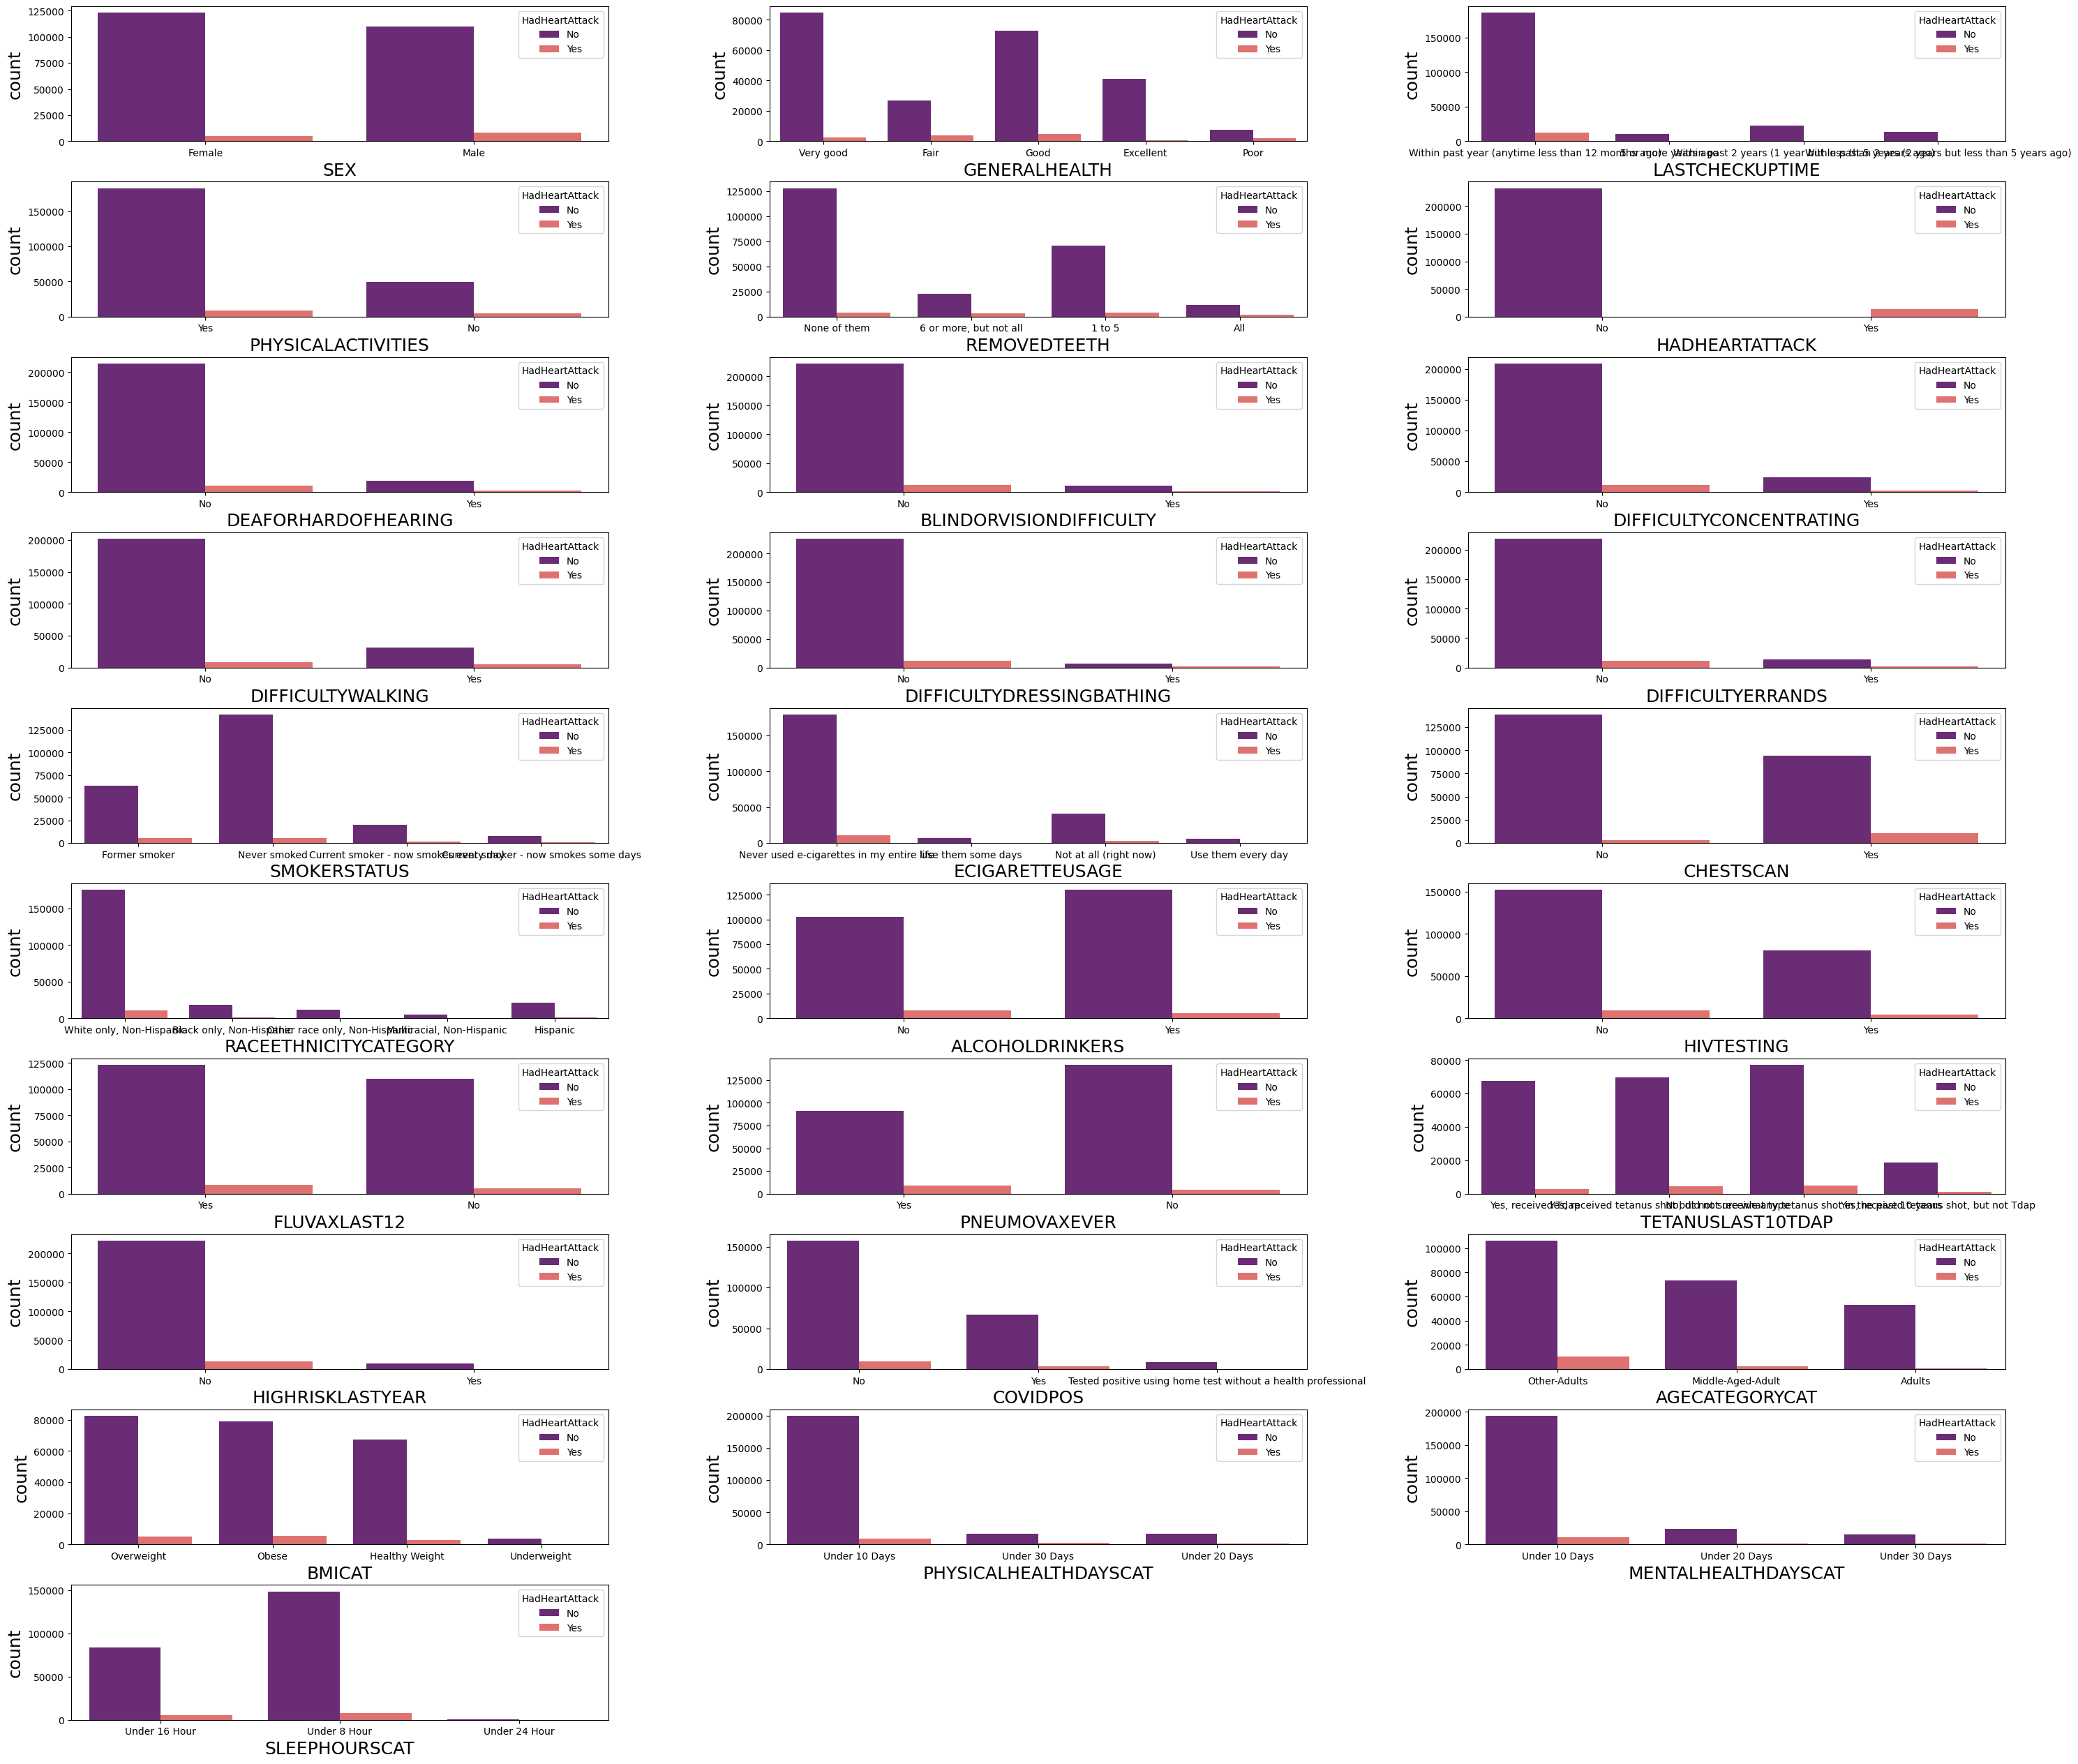

In [42]:
Cat_col = cat_col.columns

fig = plt.figure(figsize = (30, 30))

for index in range(len(Cat_col)):
    if Cat_col[index] != "target":
        plt.subplot(12, 3, index + 1)
        sns.countplot(data = data, x = Cat_col[index],
                     hue = data["HadHeartAttack"], palette = "magma", orient='y')
        plt.xlabel(Cat_col[index].upper(), fontsize = 18)
        plt.ylabel("count", fontsize = 18)
        plt.tight_layout(pad = 1.5)
        plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [43]:
data.head()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat,SleepHoursCat
342,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,...,Yes,Yes,"Yes, received Tdap",No,No,Other-Adults,Overweight,Under 10 Days,Under 10 Days,Under 16 Hour
343,Male,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,...,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 8 Hour
345,Male,Very good,Within past year (anytime less than 12 months ...,No,"6 or more, but not all",No,No,Yes,No,Yes,...,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 16 Hour
346,Female,Fair,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,Yes,...,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Other-Adults,Obese,Under 10 Days,Under 10 Days,Under 16 Hour
347,Female,Good,Within past year (anytime less than 12 months ...,Yes,1 to 5,No,No,No,No,No,...,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Other-Adults,Obese,Under 10 Days,Under 20 Days,Under 8 Hour


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Sex                        246013 non-null  object
 1   GeneralHealth              246013 non-null  object
 2   LastCheckupTime            246013 non-null  object
 3   PhysicalActivities         246013 non-null  object
 4   RemovedTeeth               246013 non-null  object
 5   HadHeartAttack             246013 non-null  object
 6   DeafOrHardOfHearing        246013 non-null  object
 7   BlindOrVisionDifficulty    246013 non-null  object
 8   DifficultyConcentrating    246013 non-null  object
 9   DifficultyWalking          246013 non-null  object
 10  DifficultyDressingBathing  246013 non-null  object
 11  DifficultyErrands          246013 non-null  object
 12  SmokerStatus               246013 non-null  object
 13  ECigaretteUsage            246013 non-null  obj

In [45]:
data['Sex'].value_counts()

Sex
Female    127806
Male      118207
Name: count, dtype: int64

In [46]:
data['GeneralHealth'].value_counts()

GeneralHealth
Very good    86996
Good         77407
Excellent    41522
Fair         30658
Poor          9430
Name: count, dtype: int64

In [47]:
data['LastCheckupTime'].value_counts()

LastCheckupTime
Within past year (anytime less than 12 months ago)         198144
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64

In [48]:
data['PhysicalActivities'].value_counts()

PhysicalActivities
Yes    191310
No      54703
Name: count, dtype: int64

In [49]:
data['RemovedTeeth'].value_counts()

RemovedTeeth
None of them              131585
1 to 5                     74701
6 or more, but not all     25949
All                        13778
Name: count, dtype: int64

In [50]:
data['HadHeartAttack'].value_counts()

HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64

In [51]:
data['DeafOrHardOfHearing'].value_counts()

DeafOrHardOfHearing
No     224981
Yes     21032
Name: count, dtype: int64

In [52]:
data['BlindOrVisionDifficulty'].value_counts()

BlindOrVisionDifficulty
No     233787
Yes     12226
Name: count, dtype: int64

In [53]:
data['DifficultyConcentrating'].value_counts()

DifficultyConcentrating
No     219793
Yes     26220
Name: count, dtype: int64

In [54]:
data['DifficultyWalking'].value_counts()

DifficultyWalking
No     209945
Yes     36068
Name: count, dtype: int64

In [55]:
data['DifficultyDressingBathing'].value_counts()

DifficultyDressingBathing
No     237673
Yes      8340
Name: count, dtype: int64

In [56]:
data['DifficultyErrands'].value_counts()

DifficultyErrands
No     229629
Yes     16384
Name: count, dtype: int64

In [57]:
data['SmokerStatus'].value_counts()

SmokerStatus
Never smoked                             147731
Former smoker                             68524
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64

In [58]:
data['ECigaretteUsage'].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    190119
Not at all (right now)                        43281
Use them some days                             6658
Use them every day                             5955
Name: count, dtype: int64

In [59]:
data['ChestScan'].value_counts()

ChestScan
No     141818
Yes    104195
Name: count, dtype: int64

In [60]:
data['RaceEthnicityCategory'].value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         186327
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64

In [61]:
data['AlcoholDrinkers'].value_counts()

AlcoholDrinkers
Yes    135299
No     110714
Name: count, dtype: int64

In [62]:
data['HIVTesting'].value_counts()

HIVTesting
No     161513
Yes     84500
Name: count, dtype: int64

In [63]:
data['FluVaxLast12'].value_counts()

FluVaxLast12
Yes    131188
No     114825
Name: count, dtype: int64

In [64]:
data['PneumoVaxEver'].value_counts()

PneumoVaxEver
No     146128
Yes     99885
Name: count, dtype: int64

In [65]:
data['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81743
Yes, received tetanus shot but not sure what type            74118
Yes, received Tdap                                           70282
Yes, received tetanus shot, but not Tdap                     19870
Name: count, dtype: int64

In [66]:
data['HighRiskLastYear'].value_counts()

HighRiskLastYear
No     235437
Yes     10576
Name: count, dtype: int64

In [67]:
data['CovidPos'].value_counts()

CovidPos
No                                                               167297
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64

In [68]:
data['AgeCategoryCat'].value_counts()

AgeCategoryCat
Other-Adults         116960
Middle-Aged-Adult     75862
Adults                53191
Name: count, dtype: int64

In [69]:
data['BMICat'].value_counts()

BMICat
Overweight        87464
Obese             84373
Healthy Weight    70422
Underweight        3754
Name: count, dtype: int64

In [70]:
data['PhysicalHealthDaysCat'].value_counts()

PhysicalHealthDaysCat
Under 10 Days    208376
Under 30 Days     19762
Under 20 Days     17875
Name: count, dtype: int64

In [71]:
data['MentalHealthDaysCat'].value_counts()

MentalHealthDaysCat
Under 10 Days    204468
Under 20 Days     24758
Under 30 Days     16787
Name: count, dtype: int64

In [72]:
data['SleepHoursCat'].value_counts()

SleepHoursCat
Under 8 Hour     156239
Under 16 Hour     89446
Under 24 Hour       328
Name: count, dtype: int64

In [73]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'].values)
data['GeneralHealth'] = le.fit_transform(data['GeneralHealth'].values)
data['LastCheckupTime'] = le.fit_transform(data['LastCheckupTime'].values)
data['PhysicalActivities'] = le.fit_transform(data['PhysicalActivities'].values)
data['RemovedTeeth'] = le.fit_transform(data['RemovedTeeth'].values)
data['DeafOrHardOfHearing'] = le.fit_transform(data['DeafOrHardOfHearing'].values)
data['BlindOrVisionDifficulty'] = le.fit_transform(data['BlindOrVisionDifficulty'].values)
data['DifficultyConcentrating'] = le.fit_transform(data['DifficultyConcentrating'].values)
data['DifficultyWalking'] = le.fit_transform(data['DifficultyWalking'].values)
data['DifficultyDressingBathing'] = le.fit_transform(data['DifficultyDressingBathing'].values)
data['DifficultyErrands'] = le.fit_transform(data['DifficultyErrands'].values)
data['SmokerStatus'] = le.fit_transform(data['SmokerStatus'].values)
data['ECigaretteUsage'] = le.fit_transform(data['ECigaretteUsage'].values)
data['ChestScan'] = le.fit_transform(data['ChestScan'].values)
data['RaceEthnicityCategory'] = le.fit_transform(data['RaceEthnicityCategory'].values)
data['AlcoholDrinkers'] = le.fit_transform(data['AlcoholDrinkers'].values)
data['HIVTesting'] = le.fit_transform(data['HIVTesting'].values)
data['FluVaxLast12'] = le.fit_transform(data['FluVaxLast12'].values)
data['PneumoVaxEver'] = le.fit_transform(data['PneumoVaxEver'].values)
data['TetanusLast10Tdap'] = le.fit_transform(data['TetanusLast10Tdap'].values)
data['HighRiskLastYear'] = le.fit_transform(data['HighRiskLastYear'].values)
data['CovidPos'] = le.fit_transform(data['CovidPos'].values)
data['AgeCategoryCat'] = le.fit_transform(data['AgeCategoryCat'].values)
data['PhysicalHealthDaysCat'] = le.fit_transform(data['PhysicalHealthDaysCat'].values)
data['MentalHealthDaysCat'] = le.fit_transform(data['MentalHealthDaysCat'].values)
data['SleepHoursCat'] = le.fit_transform(data['SleepHoursCat'].values)
data['BMICat'] = le.fit_transform(data['BMICat'].values)
data['HadHeartAttack'] = le.fit_transform(data['HadHeartAttack'].values)
data.head()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat,SleepHoursCat
342,0,4,3,1,3,0,0,0,0,0,...,1,1,1,0,0,2,2,0,0,0
343,1,4,3,1,3,0,0,0,0,0,...,1,1,2,0,0,2,1,0,0,2
345,1,4,3,0,1,0,0,1,0,1,...,0,1,0,0,2,2,1,0,0,0
346,0,1,3,1,3,0,0,0,0,1,...,1,1,0,0,2,2,1,0,0,0
347,0,2,3,1,0,0,0,0,0,0,...,1,1,0,0,0,2,1,0,1,2


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Sex                        246013 non-null  int32
 1   GeneralHealth              246013 non-null  int32
 2   LastCheckupTime            246013 non-null  int32
 3   PhysicalActivities         246013 non-null  int32
 4   RemovedTeeth               246013 non-null  int32
 5   HadHeartAttack             246013 non-null  int32
 6   DeafOrHardOfHearing        246013 non-null  int32
 7   BlindOrVisionDifficulty    246013 non-null  int32
 8   DifficultyConcentrating    246013 non-null  int32
 9   DifficultyWalking          246013 non-null  int32
 10  DifficultyDressingBathing  246013 non-null  int32
 11  DifficultyErrands          246013 non-null  int32
 12  SmokerStatus               246013 non-null  int32
 13  ECigaretteUsage            246013 non-null  int32
 14  ChestSc

In [75]:
data['Sex'].value_counts()

Sex
0    127806
1    118207
Name: count, dtype: int64

In [76]:
data['GeneralHealth'].value_counts()



GeneralHealth
4    86996
2    77407
0    41522
1    30658
3     9430
Name: count, dtype: int64

In [77]:
data['LastCheckupTime'].value_counts()


LastCheckupTime
3    198144
1     23227
2     13744
0     10898
Name: count, dtype: int64

In [78]:
data['PhysicalActivities'].value_counts()

PhysicalActivities
1    191310
0     54703
Name: count, dtype: int64

In [79]:
data['RemovedTeeth'].value_counts()



RemovedTeeth
3    131585
0     74701
1     25949
2     13778
Name: count, dtype: int64

In [80]:
data['HadHeartAttack'].value_counts()



HadHeartAttack
0    232578
1     13435
Name: count, dtype: int64

In [81]:
data['DeafOrHardOfHearing'].value_counts()



DeafOrHardOfHearing
0    224981
1     21032
Name: count, dtype: int64

In [82]:
data['BlindOrVisionDifficulty'].value_counts()



BlindOrVisionDifficulty
0    233787
1     12226
Name: count, dtype: int64

In [83]:
data['DifficultyConcentrating'].value_counts()


DifficultyConcentrating
0    219793
1     26220
Name: count, dtype: int64

In [84]:
data['DifficultyWalking'].value_counts()



DifficultyWalking
0    209945
1     36068
Name: count, dtype: int64

In [85]:
data['DifficultyDressingBathing'].value_counts()



DifficultyDressingBathing
0    237673
1      8340
Name: count, dtype: int64

In [86]:
data['DifficultyErrands'].value_counts()



DifficultyErrands
0    229629
1     16384
Name: count, dtype: int64

In [87]:
data['SmokerStatus'].value_counts()



SmokerStatus
3    147731
2     68524
0     21659
1      8099
Name: count, dtype: int64

In [88]:
data['ECigaretteUsage'].value_counts()



ECigaretteUsage
0    190119
1     43281
3      6658
2      5955
Name: count, dtype: int64

In [89]:
data['ChestScan'].value_counts()



ChestScan
0    141818
1    104195
Name: count, dtype: int64

In [90]:
data['RaceEthnicityCategory'].value_counts()



RaceEthnicityCategory
4    186327
1     22570
0     19330
3     12205
2      5581
Name: count, dtype: int64

In [91]:
data['AlcoholDrinkers'].value_counts()



AlcoholDrinkers
1    135299
0    110714
Name: count, dtype: int64

In [92]:
data['HIVTesting'].value_counts()



HIVTesting
0    161513
1     84500
Name: count, dtype: int64

In [93]:
data['FluVaxLast12'].value_counts()



FluVaxLast12
1    131188
0    114825
Name: count, dtype: int64

In [94]:
data['PneumoVaxEver'].value_counts()



PneumoVaxEver
0    146128
1     99885
Name: count, dtype: int64

In [95]:
data['TetanusLast10Tdap'].value_counts()



TetanusLast10Tdap
0    81743
2    74118
1    70282
3    19870
Name: count, dtype: int64

In [96]:
data['HighRiskLastYear'].value_counts()



HighRiskLastYear
0    235437
1     10576
Name: count, dtype: int64

In [97]:
data['CovidPos'].value_counts()



CovidPos
0    167297
2     70324
1      8392
Name: count, dtype: int64

In [98]:
data['AgeCategoryCat'].value_counts()



AgeCategoryCat
2    116960
1     75862
0     53191
Name: count, dtype: int64

In [99]:
data['BMICat'].value_counts()



BMICat
2    87464
1    84373
0    70422
3     3754
Name: count, dtype: int64

In [100]:
data['PhysicalHealthDaysCat'].value_counts()



PhysicalHealthDaysCat
0    208376
2     19762
1     17875
Name: count, dtype: int64

In [101]:
data['MentalHealthDaysCat'].value_counts()



MentalHealthDaysCat
0    204468
1     24758
2     16787
Name: count, dtype: int64

In [102]:
data['SleepHoursCat'].value_counts()

SleepHoursCat
2    156239
0     89446
1       328
Name: count, dtype: int64

# Value Of Target

Text(0.5, 1.0, 'Data From Target Variable')

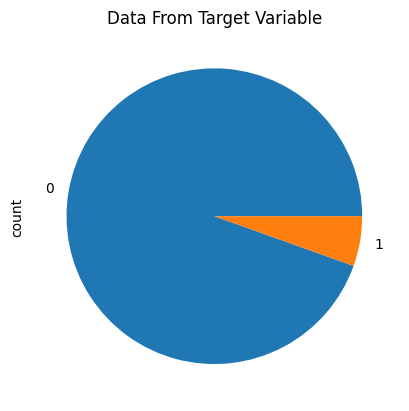

In [103]:
p = data['HadHeartAttack'].value_counts().plot(kind='pie')
p.set_title('Data From Target Variable')

# Implementation SMOTE and ADASYN

In [104]:
x_train = data.drop('HadHeartAttack', axis=1)
x_train.head()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,...,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeCategoryCat,BMICat,PhysicalHealthDaysCat,MentalHealthDaysCat,SleepHoursCat
342,0,4,3,1,3,0,0,0,0,0,...,1,1,1,0,0,2,2,0,0,0
343,1,4,3,1,3,0,0,0,0,0,...,1,1,2,0,0,2,1,0,0,2
345,1,4,3,0,1,0,1,0,1,0,...,0,1,0,0,2,2,1,0,0,0
346,0,1,3,1,3,0,0,0,1,0,...,1,1,0,0,2,2,1,0,0,0
347,0,2,3,1,0,0,0,0,0,0,...,1,1,0,0,0,2,1,0,1,2


In [105]:
y_train = data['HadHeartAttack']
y_train

342       0
343       0
345       0
346       0
347       0
         ..
445117    0
445123    0
445124    0
445128    0
445130    1
Name: HadHeartAttack, Length: 246013, dtype: int32

In [106]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

In [107]:
sm=SMOTE()
ada=ADASYN()

In [108]:
smxtrain, smytrain = sm.fit_resample(x_train, y_train)

In [109]:
print("Before Oversampling with SMOTE: ", Counter(y_train))
print("After Oversampling with SMOTE: ", Counter(smytrain))

Before Oversampling with SMOTE:  Counter({0: 232578, 1: 13435})
After Oversampling with SMOTE:  Counter({0: 232578, 1: 232578})


Text(0.5, 1.0, 'After Oversampling with SMOTE')

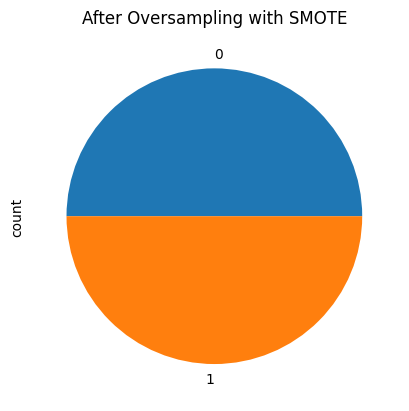

In [110]:
p = smytrain.value_counts().plot(kind='pie')
p.set_title('After Oversampling with SMOTE')

In [111]:
adaxtrain, adaytrain = ada.fit_resample(x_train, y_train)

In [112]:
print("Before Oversampling with ADASYN: ", Counter(y_train))
print("After Oversampling with ADASYN: ", Counter(adaytrain))

Before Oversampling with ADASYN:  Counter({0: 232578, 1: 13435})
After Oversampling with ADASYN:  Counter({0: 232578, 1: 229829})


Text(0.5, 1.0, 'After Oversampling with ADASYN')

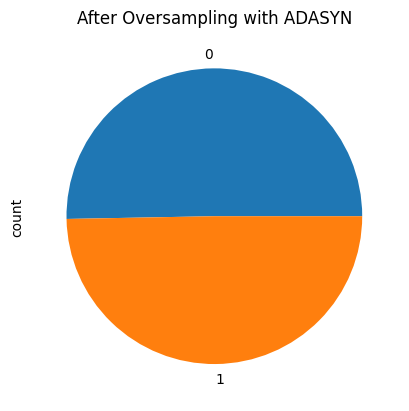

In [113]:
p = adaytrain.value_counts().plot(kind='pie')
p.set_title("After Oversampling with ADASYN")

In [114]:
data.to_csv('clean.csv', encoding='utf8')

# Modeling

# Naive Bayes Imbalance

## Akurasi, confusion matrix, precision, recall, f1-score

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
gnb = GaussianNB()
test_size = 0.1
X_train_imb, X_test_imb, Y_train_imb, Y_test_imb = train_test_split(x_train, y_train, test_size=test_size)
print(X_train_imb.shape, len(Y_test_imb))
nb_imb = gnb.fit(X_train_imb, Y_train_imb)
nb_imb_pred = nb_imb.predict(X_test_imb)
print("Akurasi = ", accuracy_score(nb_imb_pred, Y_test_imb))
print(confusion_matrix(nb_imb_pred, Y_test_imb))
print(classification_report(nb_imb_pred, Y_test_imb))

(221411, 27) 24602
Akurasi =  0.84334606942525
[[20177   776]
 [ 3078   571]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     20953
           1       0.42      0.16      0.23      3649

    accuracy                           0.84     24602
   macro avg       0.65      0.56      0.57     24602
weighted avg       0.80      0.84      0.81     24602



## Cross Validation Score

In [116]:
from sklearn.model_selection import cross_val_score
acc_nb_imb = cross_val_score(gnb, X_train_imb, Y_train_imb, cv=10, scoring='accuracy')
prec_nb_imb = cross_val_score(gnb, X_train_imb, Y_train_imb, cv=10, scoring='precision_macro')
rec_nb_imb = cross_val_score(gnb, X_train_imb, Y_train_imb, cv=10, scoring='recall_macro')
f1_nb_imb = cross_val_score(gnb, X_train_imb, Y_train_imb, cv=10, scoring='f1_macro')
print("Akurasi CV 10 Naive Bayes IMB = %0.2f (+/- %0.2f)" % (acc_nb_imb.mean()*100, acc_nb_imb.std()))
print("Precision CV 10 Naive Bayes IMB = %0.2f (+/- %0.2f)" % (prec_nb_imb.mean()*100, prec_nb_imb.std()))
print("Recall CV 10 Naive Bayes IMB = %0.2f (+/- %0.2f)" % (rec_nb_imb.mean()*100, rec_nb_imb.std()))
print("F1-Score CV 10 Naive Bayes IMB = %0.2f (+/- %0.2f)" % (f1_nb_imb.mean()*100, f1_nb_imb.std()))

Akurasi CV 10 Naive Bayes IMB = 84.31 (+/- 0.00)
Precision CV 10 Naive Bayes IMB = 56.14 (+/- 0.00)
Recall CV 10 Naive Bayes IMB = 65.16 (+/- 0.01)
F1-Score CV 10 Naive Bayes IMB = 57.29 (+/- 0.00)


# Logistic Regression IMB

## Accuracy, CM, Prec, Rec, F1

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_imb = lr.fit(X_train_imb, Y_train_imb)
lr_imb_pred = lr_imb.predict(X_test_imb)
print(accuracy_score(lr_imb_pred, Y_test_imb))
print(confusion_matrix(lr_imb_pred, Y_test_imb))
print(classification_report(lr_imb_pred, Y_test_imb))

0.9448418827737582
[[23243  1345]
 [   12     2]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24588
           1       0.00      0.14      0.00        14

    accuracy                           0.94     24602
   macro avg       0.50      0.54      0.49     24602
weighted avg       1.00      0.94      0.97     24602



## Cross Val Score Log IMB

In [118]:
from sklearn.model_selection import cross_val_score
acc_lr_imb = cross_val_score(lr, X_train_imb, Y_train_imb, cv=10, scoring='accuracy')
prec_lr_imb = cross_val_score(lr, X_train_imb, Y_train_imb, cv=10, scoring='precision_macro')
rec_lr_imb = cross_val_score(lr, X_train_imb, Y_train_imb, cv=10, scoring='recall_macro')
f1_lr_imb = cross_val_score(lr, X_train_imb, Y_train_imb, cv=10, scoring='f1_macro')
print("Akurasi CV 10 LogReg IMB = %0.2f (+/- %0.2f)" % (acc_lr_imb.mean()*100, acc_lr_imb.std()))
print("Precision CV 10 LogReg IMB = %0.2f (+/- %0.2f)" % (prec_lr_imb.mean()*100, prec_lr_imb.std()))
print("Recall CV 10 LogReg IMB = %0.2f (+/- %0.2f)" % (rec_lr_imb.mean()*100, rec_lr_imb.std()))
print("F1-Score CV 10 LogReg IMB = %0.2f (+/- %0.2f)" % (f1_lr_imb.mean()*100, f1_lr_imb.std()))

Akurasi CV 10 LogReg IMB = 94.52 (+/- 0.00)
Precision CV 10 LogReg IMB = 66.77 (+/- 0.04)
Recall CV 10 LogReg IMB = 50.26 (+/- 0.00)
F1-Score CV 10 LogReg IMB = 49.16 (+/- 0.00)


# Decision Tree IMB

## Acc, CM, Prec, Rec, F1-score

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=0)
dt_imb = dt.fit(X_train_imb, Y_train_imb)
dt_imb_pred = dt_imb.predict(X_test_imb)
print(accuracy_score(dt_imb_pred, Y_test_imb))
print(confusion_matrix(dt_imb_pred, Y_test_imb))
print(classification_report(dt_imb_pred, Y_test_imb))

0.9015527192911146
[[21938  1105]
 [ 1317   242]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     23043
           1       0.18      0.16      0.17      1559

    accuracy                           0.90     24602
   macro avg       0.56      0.55      0.56     24602
weighted avg       0.89      0.90      0.90     24602



## Cross Val Score DT IMB

In [120]:
from sklearn.model_selection import cross_val_score
acc_dt_imb = cross_val_score(dt, X_train_imb, Y_train_imb, cv=10, scoring='accuracy')
prec_dt_imb = cross_val_score(dt, X_train_imb, Y_train_imb, cv=10, scoring='precision_macro')
rec_dt_imb = cross_val_score(dt, X_train_imb, Y_train_imb, cv=10, scoring='recall_macro')
f1_dt_imb = cross_val_score(dt, X_train_imb, Y_train_imb, cv=10, scoring='f1_macro')
print("Akurasi CV 10 DT IMB = %0.2f (+/- %0.2f)" % (acc_dt_imb.mean()*100, acc_dt_imb.std()))
print("Precision CV 10 DT IMB = %0.2f (+/- %0.2f)" % (prec_dt_imb.mean()*100, prec_dt_imb.std()))
print("Recall CV 10 DT IMB = %0.2f (+/- %0.2f)" % (rec_dt_imb.mean()*100, rec_dt_imb.std()))
print("F1-Score CV 10 DT IMB = %0.2f (+/- %0.2f)" % (f1_dt_imb.mean()*100, f1_dt_imb.std()))

Akurasi CV 10 DT IMB = 89.95 (+/- 0.00)
Precision CV 10 DT IMB = 54.90 (+/- 0.00)
Recall CV 10 DT IMB = 55.76 (+/- 0.00)
F1-Score CV 10 DT IMB = 55.27 (+/- 0.00)


# Random Forest IMB

## Acc, CM, Prec, Rec, F1

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators = 5)
rf_imb = rf.fit(X_train_imb, Y_train_imb)
rf_imb_pred = rf_imb.predict(X_test_imb)
print(accuracy_score(rf_imb_pred, Y_test_imb))
print(confusion_matrix(rf_imb_pred, Y_test_imb))
print(classification_report(rf_imb_pred, Y_test_imb))

0.9329729290301602
[[22861  1255]
 [  394    92]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     24116
           1       0.07      0.19      0.10       486

    accuracy                           0.93     24602
   macro avg       0.53      0.57      0.53     24602
weighted avg       0.96      0.93      0.95     24602



## Cross Val Score RF IMB

In [122]:
from sklearn.model_selection import cross_val_score
acc_rf_imb = cross_val_score(rf, X_train_imb, Y_train_imb, cv=10, scoring='accuracy')
prec_rf_imb = cross_val_score(rf, X_train_imb, Y_train_imb, cv=10, scoring='precision_macro')
rec_rf_imb = cross_val_score(rf, X_train_imb, Y_train_imb, cv=10, scoring='recall_macro')
f1_rf_imb = cross_val_score(rf, X_train_imb, Y_train_imb, cv=10, scoring='f1_macro')
print("Akurasi CV 10 DT IMB = %0.2f (+/- %0.2f)" % (acc_rf_imb.mean()*100, acc_rf_imb.std()))
print("Precision CV 10 DT IMB = %0.2f (+/- %0.2f)" % (prec_rf_imb.mean()*100, prec_rf_imb.std()))
print("Recall CV 10 DT IMB = %0.2f (+/- %0.2f)" % (rec_rf_imb.mean()*100, rec_rf_imb.std()))
print("F1-Score CV 10 DT IMB = %0.2f (+/- %0.2f)" % (f1_rf_imb.mean()*100, f1_rf_imb.std()))

Akurasi CV 10 DT IMB = 93.42 (+/- 0.00)
Precision CV 10 DT IMB = 57.41 (+/- 0.01)
Recall CV 10 DT IMB = 52.63 (+/- 0.00)
F1-Score CV 10 DT IMB = 53.39 (+/- 0.00)


# KNN IMB

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean', weights='distance', n_neighbors=5)
knn_imb = knn.fit(X_train_imb, Y_train_imb)
knn_imb_pred = knn_imb.predict(X_test_imb)
print(accuracy_score(knn_imb_pred, Y_test_imb))
print(confusion_matrix(knn_imb_pred, Y_test_imb))
print(classification_report(knn_imb_pred, Y_test_imb))

0.9362246971790912
[[22994  1308]
 [  261    39]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     24302
           1       0.03      0.13      0.05       300

    accuracy                           0.94     24602
   macro avg       0.51      0.54      0.51     24602
weighted avg       0.98      0.94      0.96     24602



## Cross Val Score KNN IMB

# ROC dan AUC Data Imbalance

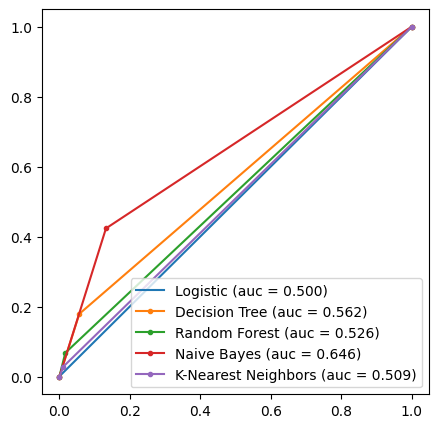

In [124]:
lr_fpr, lr_tpr, threshold = roc_curve(Y_test_imb, lr_imb_pred)
auc_lr = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(Y_test_imb, dt_imb_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test_imb, rf_imb_pred)
auc_rf = auc(rf_fpr, rf_tpr)

NB_fpr, NB_tpr, threshold = roc_curve(Y_test_imb, nb_imb_pred)
auc_NB = auc(NB_fpr, NB_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(Y_test_imb, knn_imb_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_lr)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_NB)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (auc = %0.3f)' % auc_knn)


plt.legend()
plt.show()


# Naive Bayes SMOTE

## Akurasi, confusion matrix, precision, recall, f1-score

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
gnb = GaussianNB()
test_size = 0.2
X_train_sm, X_test_sm, Y_train_sm, Y_test_sm = train_test_split(smxtrain, smytrain, test_size=test_size)
print(X_train_sm.shape, len(Y_test_sm))
nb_sm = gnb.fit(X_train_sm, Y_train_sm)
nb_sm_pred = nb_sm.predict(X_test_sm)
print("Akurasi = ", accuracy_score(nb_sm_pred, Y_test_sm))
print(confusion_matrix(nb_sm_pred, Y_test_sm))
print(classification_report(nb_sm_pred, Y_test_sm))

(372124, 27) 93032
Akurasi =  0.7199350761028463
[[27409  6980]
 [19075 39568]]
              precision    recall  f1-score   support

           0       0.59      0.80      0.68     34389
           1       0.85      0.67      0.75     58643

    accuracy                           0.72     93032
   macro avg       0.72      0.74      0.72     93032
weighted avg       0.75      0.72      0.72     93032



## Cross Validation Score

In [126]:
from sklearn.model_selection import cross_val_score
acc_nb_sm = cross_val_score(gnb, X_train_sm, Y_train_sm, cv=10, scoring='accuracy')
prec_nb_sm = cross_val_score(gnb, X_train_sm, Y_train_sm, cv=10, scoring='precision_macro')
rec_nb_sm = cross_val_score(gnb, X_train_sm, Y_train_sm, cv=10, scoring='recall_macro')
f1_nb_sm = cross_val_score(gnb, X_train_sm, Y_train_sm, cv=10, scoring='f1_macro')
print("Akurasi CV 10 Naive Bayes SM = %0.2f (+/- %0.2f)" % (acc_nb_sm.mean()*100, acc_nb_sm.std()))
print("Precision CV 10 Naive Bayes SM = %0.2f (+/- %0.2f)" % (prec_nb_sm.mean()*100, prec_nb_sm.std()))
print("Recall CV 10 Naive Bayes SM = %0.2f (+/- %0.2f)" % (rec_nb_sm.mean()*100, rec_nb_sm.std()))
print("F1-Score CV 10 Naive Bayes SM = %0.2f (+/- %0.2f)" % (f1_nb_sm.mean()*100, f1_nb_sm.std()))

Akurasi CV 10 Naive Bayes SM = 72.12 (+/- 0.00)
Precision CV 10 Naive Bayes SM = 73.69 (+/- 0.00)
Recall CV 10 Naive Bayes SM = 72.12 (+/- 0.00)
F1-Score CV 10 Naive Bayes SM = 71.65 (+/- 0.00)


# Logistic Regression SM

## Accuracy, CM, Prec, Rec, F1

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_sm = lr.fit(X_train_sm, Y_train_sm)
lr_sm_pred = lr_sm.predict(X_test_sm)
print(accuracy_score(lr_sm_pred, Y_test_sm))
print(confusion_matrix(lr_sm_pred, Y_test_sm))
print(classification_report(lr_sm_pred, Y_test_sm))

0.7459583799122882
[[33345 10495]
 [13139 36053]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     43840
           1       0.77      0.73      0.75     49192

    accuracy                           0.75     93032
   macro avg       0.75      0.75      0.75     93032
weighted avg       0.75      0.75      0.75     93032



## Cross Val Score Log SM

In [128]:
from sklearn.model_selection import cross_val_score
acc_lr_sm = cross_val_score(lr, X_train_sm, Y_train_sm, cv=10, scoring='accuracy')
prec_lr_sm = cross_val_score(lr, X_train_sm, Y_train_sm, cv=10, scoring='precision_macro')
rec_lr_sm = cross_val_score(lr, X_train_sm, Y_train_sm, cv=10, scoring='recall_macro')
f1_lr_sm = cross_val_score(lr, X_train_sm, Y_train_sm, cv=10, scoring='f1_macro')
print("Akurasi CV 10 LogReg SM = %0.2f (+/- %0.2f)" % (acc_lr_sm.mean()*100, acc_lr_sm.std()))
print("Precision CV 10 LogReg SM = %0.2f (+/- %0.2f)" % (prec_lr_sm.mean()*100, prec_lr_sm.std()))
print("Recall CV 10 LogReg SM = %0.2f (+/- %0.2f)" % (rec_lr_sm.mean()*100, rec_lr_sm.std()))
print("F1-Score CV 10 LogReg SM = %0.2f (+/- %0.2f)" % (f1_lr_sm.mean()*100, f1_lr_sm.std()))

Akurasi CV 10 LogReg SM = 74.67 (+/- 0.00)
Precision CV 10 LogReg SM = 74.74 (+/- 0.00)
Recall CV 10 LogReg SM = 74.67 (+/- 0.00)
F1-Score CV 10 LogReg SM = 74.66 (+/- 0.00)


# Decision Tree SM

## Acc, CM, Prec, Rec, F1-score

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=0)
dt_sm = dt.fit(X_train_sm, Y_train_sm)
dt_sm_pred = dt_sm.predict(X_test_sm)
print(accuracy_score(dt_sm_pred, Y_test_sm))
print(confusion_matrix(dt_sm_pred, Y_test_sm))
print(classification_report(dt_sm_pred, Y_test_sm))

0.9050649238971537
[[39638  1986]
 [ 6846 44562]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     41624
           1       0.96      0.87      0.91     51408

    accuracy                           0.91     93032
   macro avg       0.91      0.91      0.90     93032
weighted avg       0.91      0.91      0.91     93032



## Cross Val Score DT SM

# Random Forest SM

## Acc, CM, Prec, Rec, F1

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators = 5)
rf_sm = rf.fit(X_train_sm, Y_train_sm)
rf_sm_pred = rf_imb.predict(X_test_sm)
print(accuracy_score(rf_sm_pred, Y_test_sm))
print(confusion_matrix(rf_sm_pred, Y_test_sm))
print(classification_report(rf_sm_pred, Y_test_sm))

0.6375655688365294
[[46331 33565]
 [  153 12983]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     79896
           1       0.28      0.99      0.44     13136

    accuracy                           0.64     93032
   macro avg       0.64      0.78      0.58     93032
weighted avg       0.90      0.64      0.69     93032



## Cross Val Score RF SM

# KNN SM

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean', weights='distance', n_neighbors=5)
knn_sm = knn.fit(X_train_sm, Y_train_sm)
knn_sm_pred = knn_sm.predict(X_test_sm)
print(accuracy_score(knn_sm_pred, Y_test_sm))
print(confusion_matrix(knn_sm_pred, Y_test_sm))
print(classification_report(knn_sm_pred, Y_test_sm))

0.8651001805830252
[[34874   940]
 [11610 45608]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     35814
           1       0.98      0.80      0.88     57218

    accuracy                           0.87     93032
   macro avg       0.87      0.89      0.86     93032
weighted avg       0.89      0.87      0.87     93032



## Cross Val Score KNN SM

# ROC dan AUC Data SMOTE

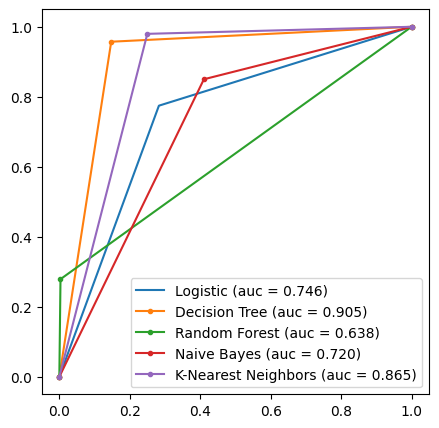

In [132]:
lr_fpr, lr_tpr, threshold = roc_curve(Y_test_sm, lr_sm_pred)
auc_lr = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(Y_test_sm, dt_sm_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test_sm, rf_sm_pred)
auc_rf = auc(rf_fpr, rf_tpr)

NB_fpr, NB_tpr, threshold = roc_curve(Y_test_sm, nb_sm_pred)
auc_NB = auc(NB_fpr, NB_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(Y_test_sm, knn_sm_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_lr)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_NB)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (auc = %0.3f)' % auc_knn)


plt.legend()
plt.show()


# Naive Bayes ADA

## Akurasi, confusion matrix, precision, recall, f1-score

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
gnb = GaussianNB()
test_size = 0.1
X_train_ada, X_test_ada, Y_train_ada, Y_test_ada = train_test_split(adaxtrain, adaytrain, test_size=test_size)
print(X_train_ada.shape, len(Y_test_ada))
nb_ada = gnb.fit(X_train_ada, Y_train_ada)
nb_ada_pred = nb_ada.predict(X_test_ada)
print("Akurasi = ", accuracy_score(nb_ada_pred, Y_test_ada))
print(confusion_matrix(nb_ada_pred, Y_test_ada))
print(classification_report(nb_ada_pred, Y_test_ada))

(416166, 27) 46241
Akurasi =  0.712917108194027
[[13325  3414]
 [ 9861 19641]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67     16739
           1       0.85      0.67      0.75     29502

    accuracy                           0.71     46241
   macro avg       0.71      0.73      0.71     46241
weighted avg       0.75      0.71      0.72     46241



## Cross Validation Score

# Logistic Regression ADA

## Accuracy, CM, Prec, Rec, F1

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_ada = lr.fit(X_train_ada, Y_train_ada)
lr_ada_pred = lr_ada.predict(X_test_ada)
print(accuracy_score(lr_ada_pred, Y_test_ada))
print(confusion_matrix(lr_ada_pred, Y_test_ada))
print(classification_report(lr_ada_pred, Y_test_ada))

0.7427391276140222
[[16650  5360]
 [ 6536 17695]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     22010
           1       0.77      0.73      0.75     24231

    accuracy                           0.74     46241
   macro avg       0.74      0.74      0.74     46241
weighted avg       0.74      0.74      0.74     46241



## Cross Val Score Log ADA

# Decision Tree ADA

## Acc, CM, Prec, Rec, F1-score

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=0)
dt_ada = dt.fit(X_train_ada, Y_train_ada)
dt_ada_pred = dt_ada.predict(X_test_ada)
print(accuracy_score(dt_ada_pred, Y_test_ada))
print(confusion_matrix(dt_ada_pred, Y_test_ada))
print(classification_report(dt_ada_pred, Y_test_ada))

0.9107502000389265
[[19891   832]
 [ 3295 22223]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20723
           1       0.96      0.87      0.92     25518

    accuracy                           0.91     46241
   macro avg       0.91      0.92      0.91     46241
weighted avg       0.92      0.91      0.91     46241



## Cross Val Score DT ADA

# Random Forest ADA

## Acc, CM, Prec, Rec, F1

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators = 5)
rf_ada = rf.fit(X_train_ada, Y_train_ada)
rf_ada_pred = rf_ada.predict(X_test_ada)
print(accuracy_score(rf_ada_pred, Y_test_ada))
print(confusion_matrix(rf_ada_pred, Y_test_ada))
print(classification_report(rf_ada_pred, Y_test_ada))

0.9212603533660604
[[20372   827]
 [ 2814 22228]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21199
           1       0.96      0.89      0.92     25042

    accuracy                           0.92     46241
   macro avg       0.92      0.92      0.92     46241
weighted avg       0.92      0.92      0.92     46241



## Cross Val Score RF ADA

# KNN ADA

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean', weights='distance', n_neighbors=5)
knn_ada = knn.fit(X_train_ada, Y_train_ada)
knn_ada_pred = knn_ada.predict(X_test_ada)
print(accuracy_score(knn_ada_pred, Y_test_ada))
print(confusion_matrix(knn_ada_pred, Y_test_ada))
print(classification_report(knn_ada_pred, Y_test_ada))

0.867563417746156
[[17471   409]
 [ 5715 22646]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     17880
           1       0.98      0.80      0.88     28361

    accuracy                           0.87     46241
   macro avg       0.87      0.89      0.87     46241
weighted avg       0.89      0.87      0.87     46241



## Cross Val Score KNN ADA

In [138]:
          
                        
   # ROC dan AUC Data Imbalance

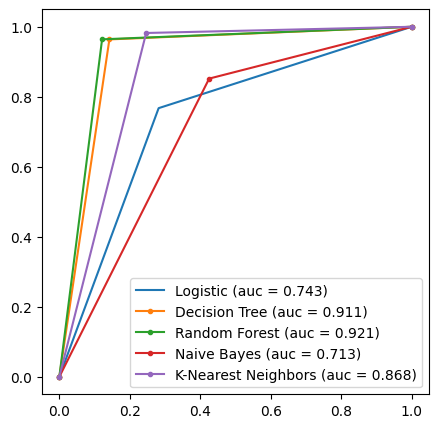

In [139]:
lr_fpr, lr_tpr, threshold = roc_curve(Y_test_ada, lr_ada_pred)
auc_lr = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(Y_test_ada, dt_ada_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test_ada, rf_ada_pred)
auc_rf = auc(rf_fpr, rf_tpr)

NB_fpr, NB_tpr, threshold = roc_curve(Y_test_ada, nb_ada_pred)
auc_NB = auc(NB_fpr, NB_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(Y_test_ada, knn_ada_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_lr)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_NB)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (auc = %0.3f)' % auc_knn)


plt.legend()
plt.show()


# ALL ROC AND AUC

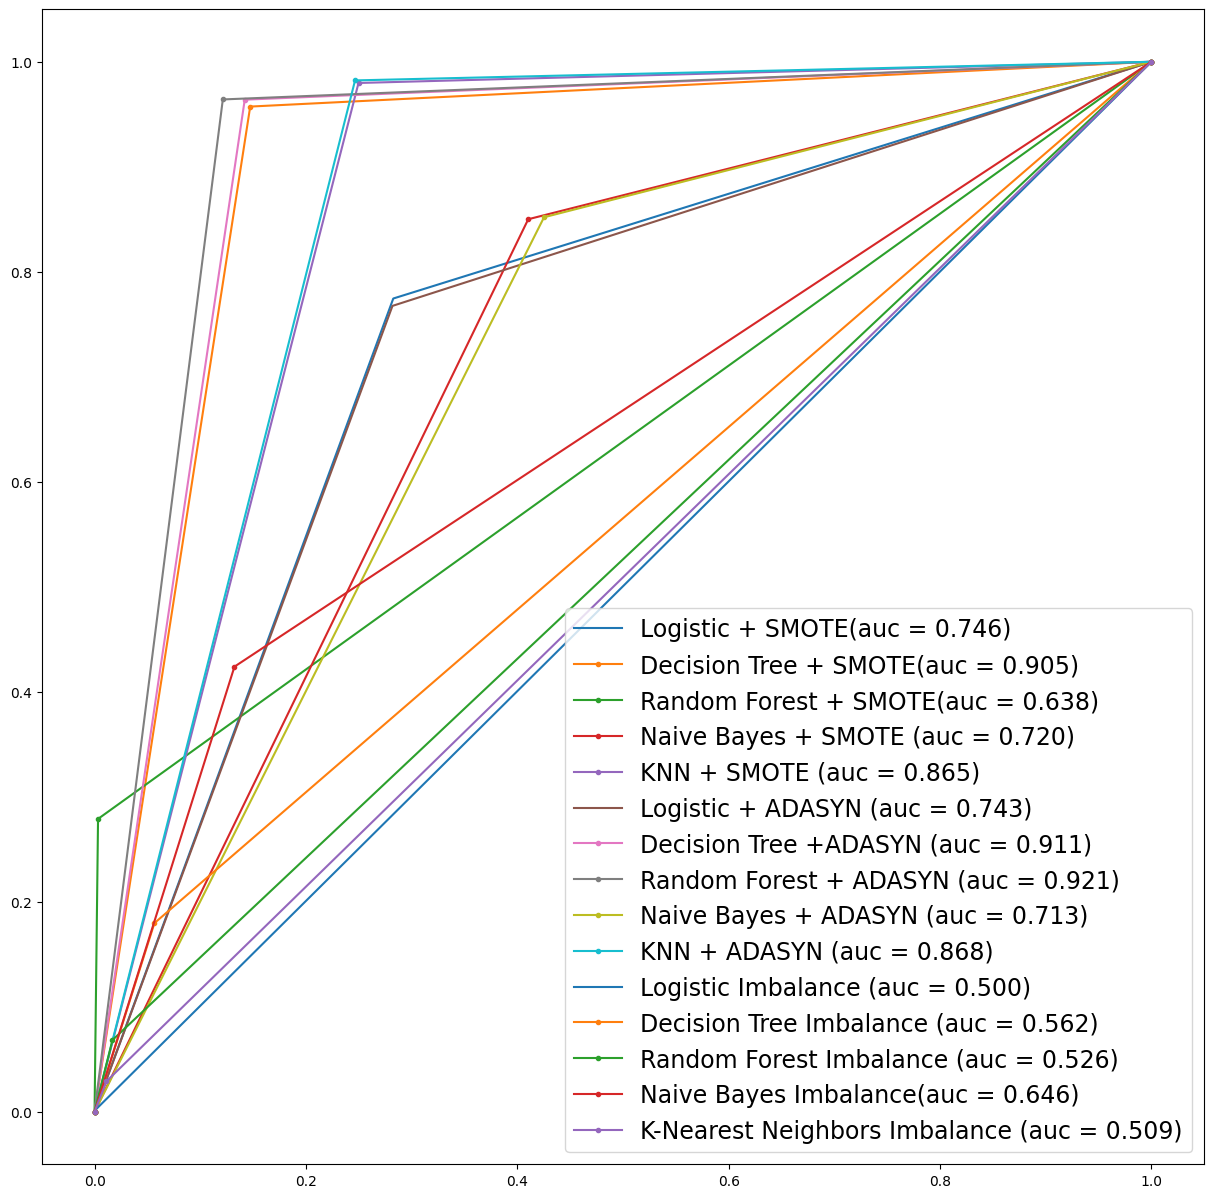

In [144]:

lr_fpr_ada, lr_tpr_ada, threshold = roc_curve(Y_test_ada, lr_ada_pred)
auc_lr_ada = auc(lr_fpr_ada, lr_tpr_ada)

dt_fpr_ada, dt_tpr_ada, threshold = roc_curve(Y_test_ada, dt_ada_pred)
auc_dt_ada = auc(dt_fpr_ada, dt_tpr_ada)

rf_fpr_ada, rf_tpr_ada, threshold = roc_curve(Y_test_ada, rf_ada_pred)
auc_rf_ada = auc(rf_fpr_ada, rf_tpr_ada)

NB_fpr_ada, NB_tpr_ada, threshold = roc_curve(Y_test_ada, nb_ada_pred)
auc_NB_ada = auc(NB_fpr_ada, NB_tpr_ada)

knn_fpr_ada, knn_tpr_ada, threshold = roc_curve(Y_test_ada, knn_ada_pred)
auc_knn_ada = auc(knn_fpr_ada, knn_tpr_ada)

lr_fpr, lr_tpr, threshold = roc_curve(Y_test_sm, lr_sm_pred)
auc_lr = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(Y_test_sm, dt_sm_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test_sm, rf_sm_pred)
auc_rf = auc(rf_fpr, rf_tpr)

NB_fpr, NB_tpr, threshold = roc_curve(Y_test_sm, nb_sm_pred)
auc_NB = auc(NB_fpr, NB_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(Y_test_sm, knn_sm_pred)
auc_knn = auc(knn_fpr, knn_tpr)

lr_fpr_num, lr_tpr_num, threshold = roc_curve(Y_test_imb, lr_imb_pred)
auc_lr_num = auc(lr_fpr_num, lr_tpr_num)

dt_fpr_num, dt_tpr_num, threshold = roc_curve(Y_test_imb, dt_imb_pred)
auc_dt_num = auc(dt_fpr_num, dt_tpr_num)

rf_fpr_num, rf_tpr_num, threshold = roc_curve(Y_test_imb, rf_imb_pred)
auc_rf_num = auc(rf_fpr_num, rf_tpr_num)

NB_fpr_num, NB_tpr_num, threshold = roc_curve(Y_test_imb, nb_imb_pred)
auc_NB_num = auc(NB_fpr_num, NB_tpr_num)

knn_fpr_num, knn_tpr_num, threshold = roc_curve(Y_test_imb, knn_imb_pred)
auc_knn_num = auc(knn_fpr_num, knn_tpr_num)

plt.figure(figsize=(15, 15), dpi=100)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic + SMOTE(auc = %0.3f)' % auc_lr)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree + SMOTE(auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest + SMOTE(auc = %0.3f)' % auc_rf)
plt.plot(NB_fpr, NB_tpr, marker='.', label='Naive Bayes + SMOTE (auc = %0.3f)' % auc_NB)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN + SMOTE (auc = %0.3f)' % auc_knn)

plt.plot(lr_fpr_ada, lr_tpr_ada, linestyle='-', label='Logistic + ADASYN (auc = %0.3f)' % auc_lr_ada)
plt.plot(dt_fpr_ada, dt_tpr_ada, marker='.', label='Decision Tree +ADASYN (auc = %0.3f)' % auc_dt_ada)
plt.plot(rf_fpr_ada, rf_tpr_ada, marker='.', label='Random Forest + ADASYN (auc = %0.3f)' % auc_rf_ada)
plt.plot(NB_fpr_ada, NB_tpr_ada, marker='.', label='Naive Bayes + ADASYN (auc = %0.3f)' % auc_NB_ada)
plt.plot(knn_fpr_ada, knn_tpr_ada, marker='.', label='KNN + ADASYN (auc = %0.3f)' % auc_knn_ada)

plt.plot(lr_fpr_num, lr_tpr_num, linestyle='-', label='Logistic Imbalance (auc = %0.3f)' % auc_lr_num)
plt.plot(dt_fpr_num, dt_tpr_num, marker='.', label='Decision Tree Imbalance (auc = %0.3f)' % auc_dt_num)
plt.plot(rf_fpr_num, rf_tpr_num, marker='.', label='Random Forest Imbalance (auc = %0.3f)' % auc_rf_num)
plt.plot(NB_fpr_num, NB_tpr_num, marker='.', label='Naive Bayes Imbalance(auc = %0.3f)' % auc_NB_num)
plt.plot(knn_fpr_num, knn_tpr_num, marker='.', label='K-Nearest Neighbors Imbalance (auc = %0.3f)' % auc_knn_num)



plt.legend(fontsize=17)
plt.show()
